In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the house price dataset
house_data = pd.read_csv("/content/data.csv")

# Handle missing values
house_data = house_data.dropna()

In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


<ipython-input-25-aa413b100bee>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(house_data.corr(),annot=True,vmin=-1,vmax=1,square=True)


<Axes: >

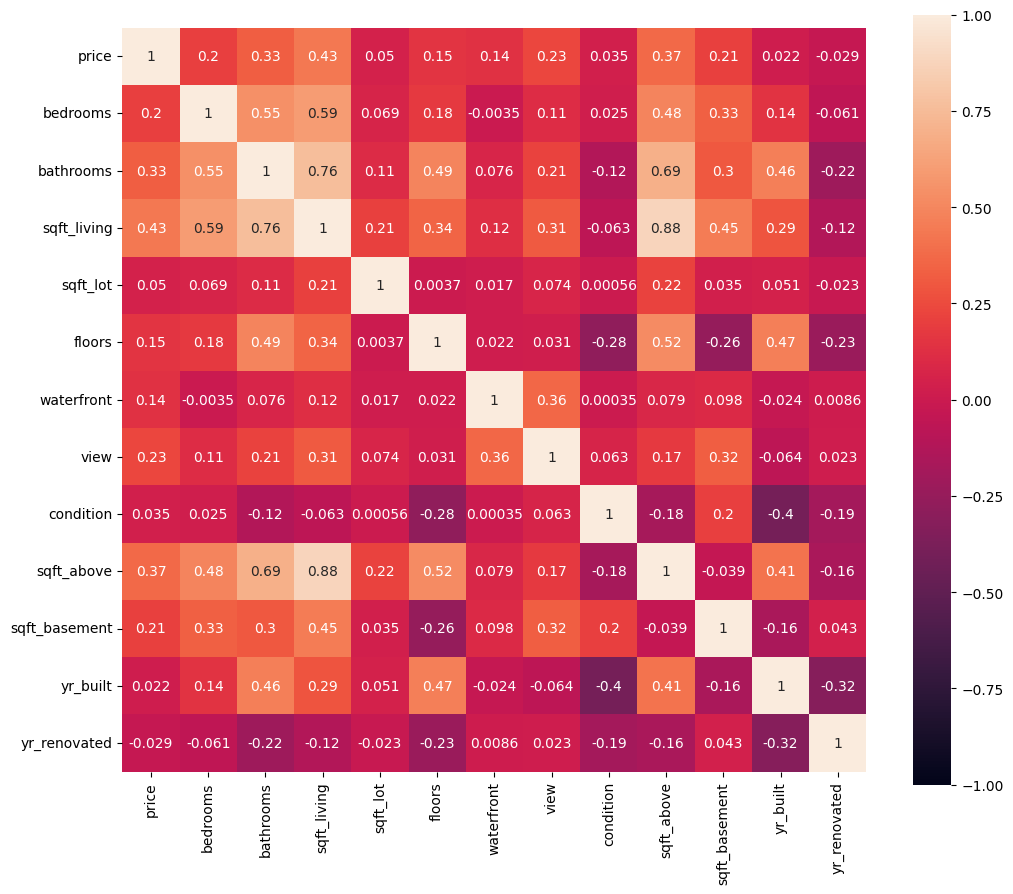

In [ ]:
# Heatmap - for entire dataset
plt.figure(figsize=(12,10))
sns.heatmap(house_data.corr(),annot=True,vmin=-1,vmax=1,square=True)

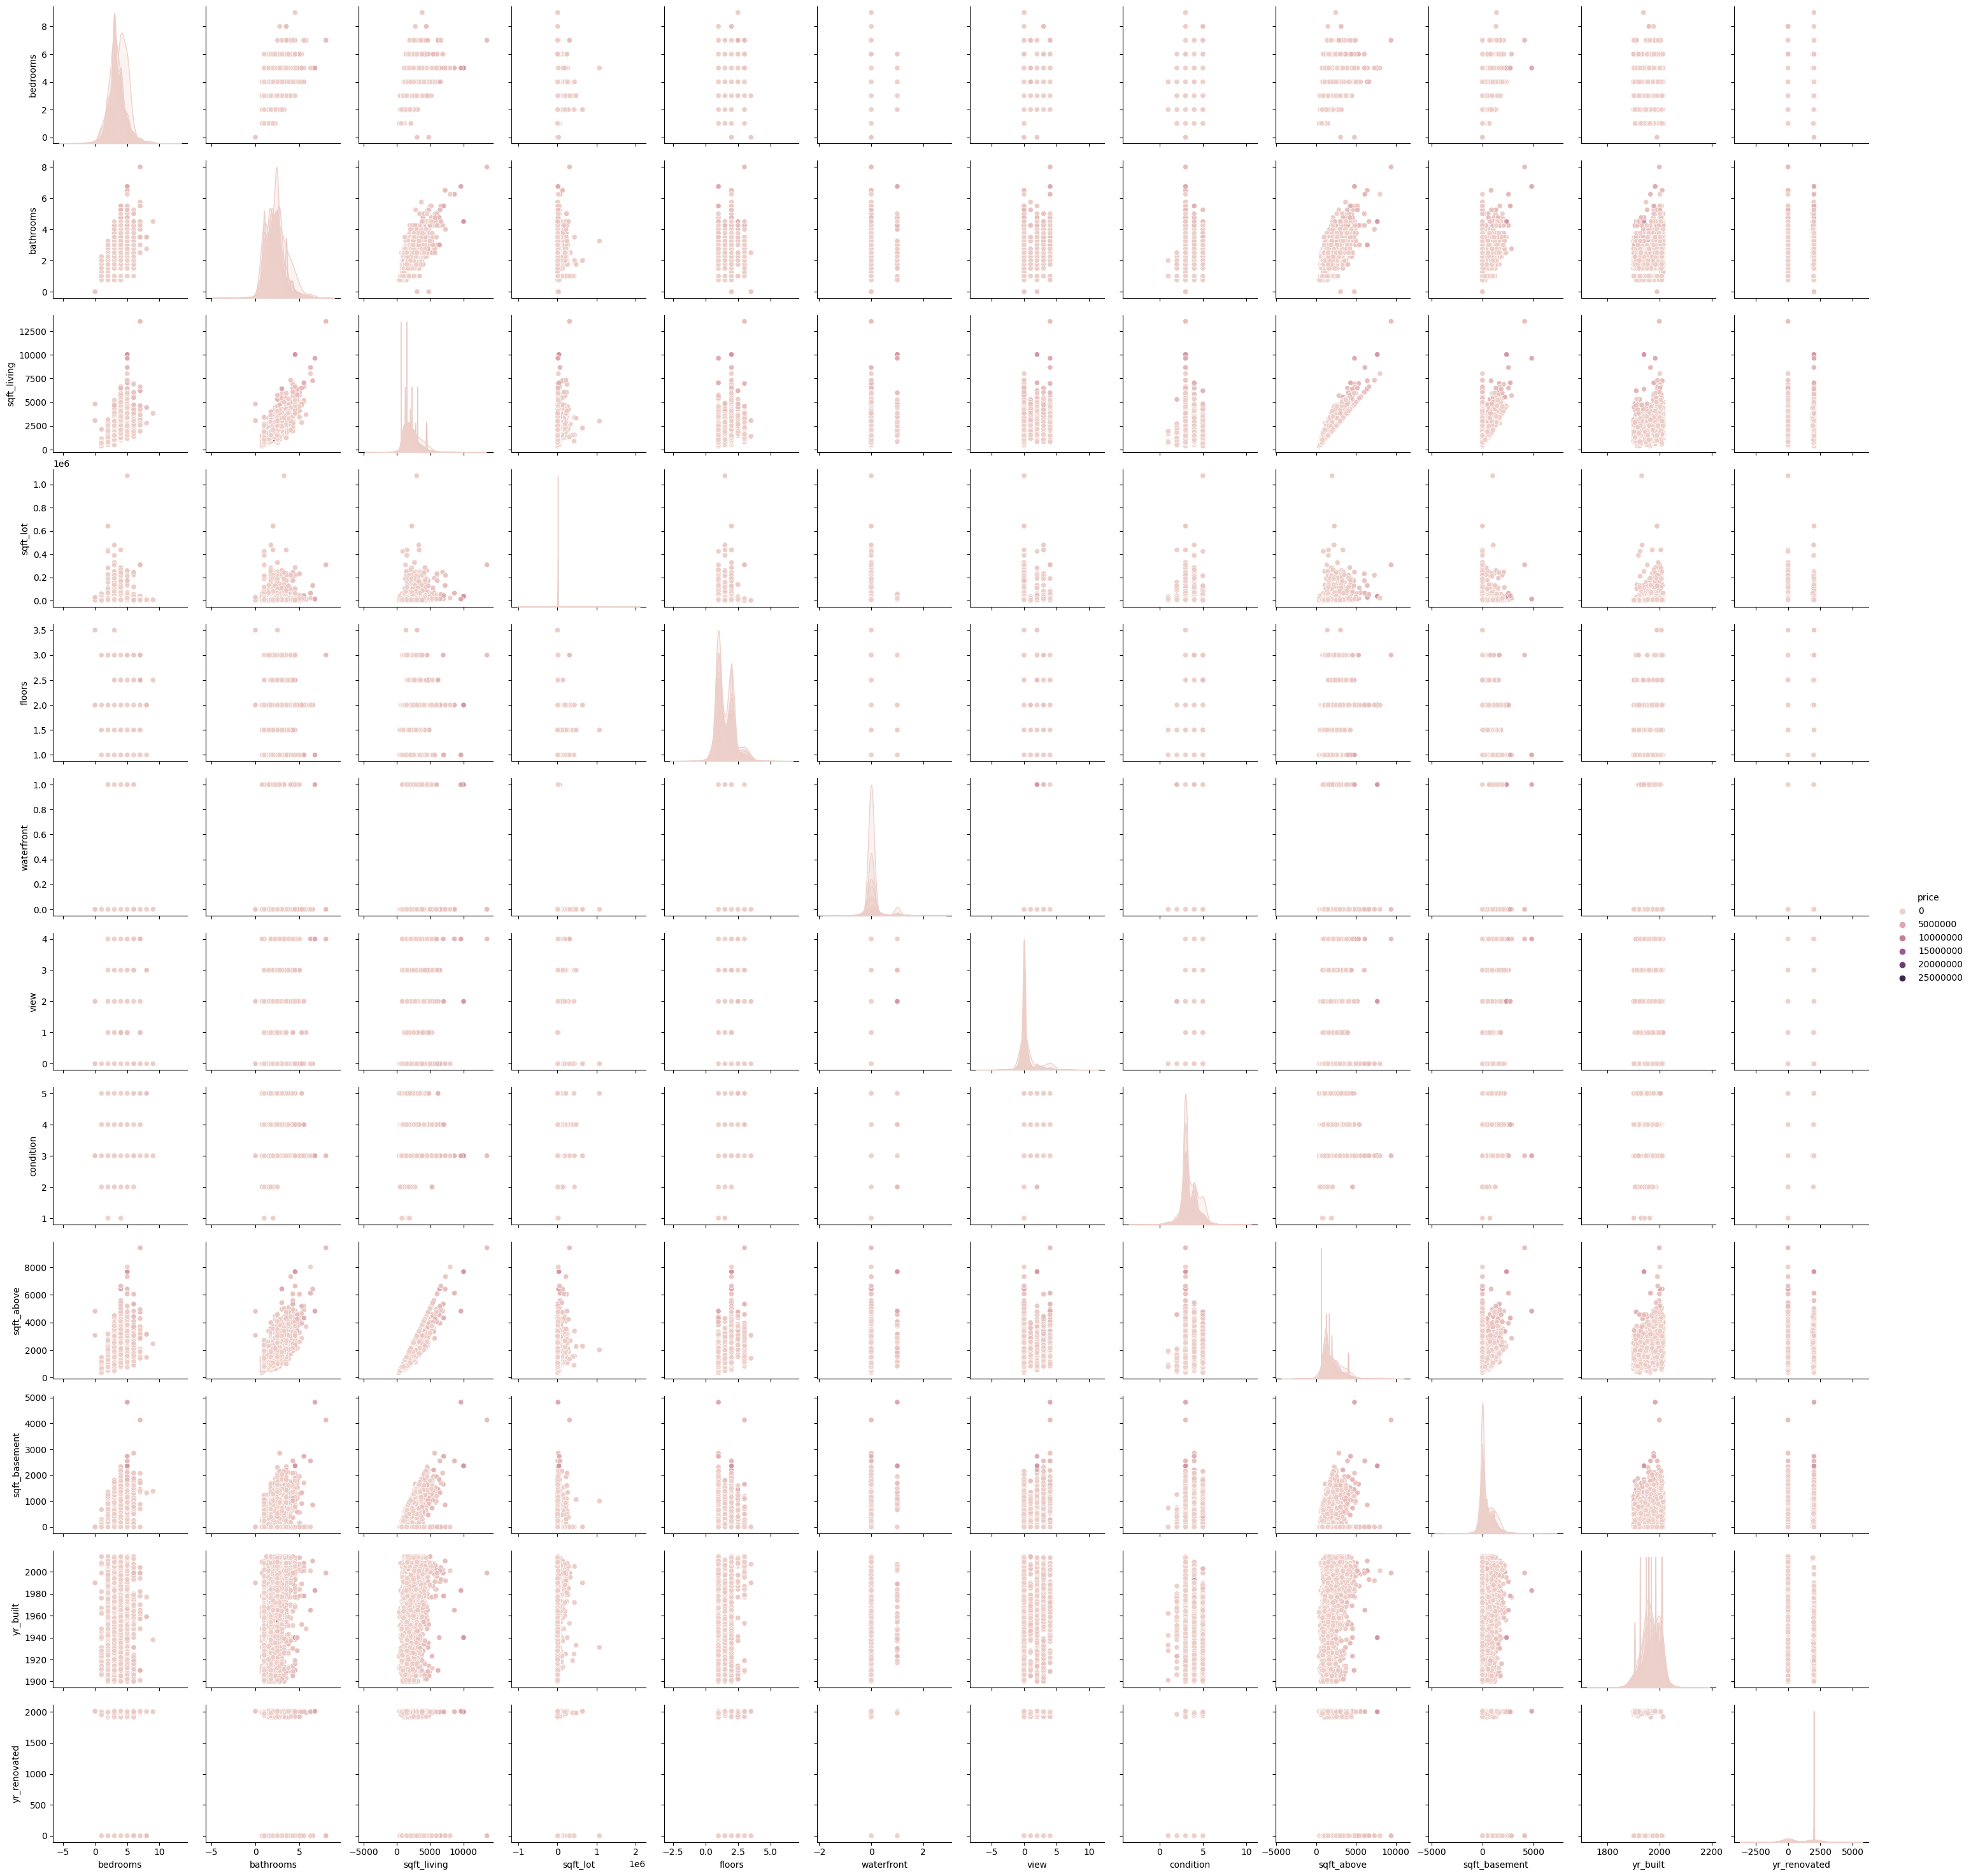

In [ ]:
# Pairplot
# This is entire dataframe

sns.pairplot(data=house_data,hue="price")

{'whiskers': [<matplotlib.lines.Line2D at 0x7c05707796c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c0570779c00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c0570779420>],
 'medians': [<matplotlib.lines.Line2D at 0x7c057077a140>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c057077a3e0>],
 'means': []}

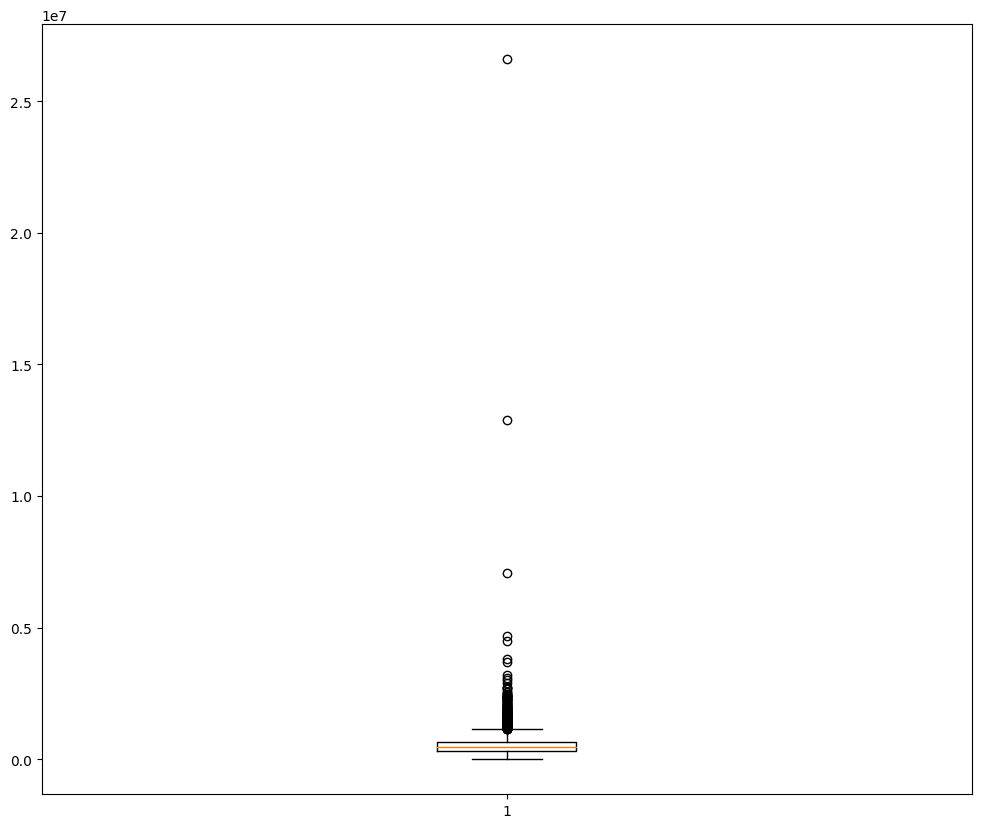

In [ ]:
# boxplot
# This is also for only column
plt.figure(figsize=(12,10))
plt.boxplot(house_data["price"])

<Axes: xlabel='price', ylabel='Density'>

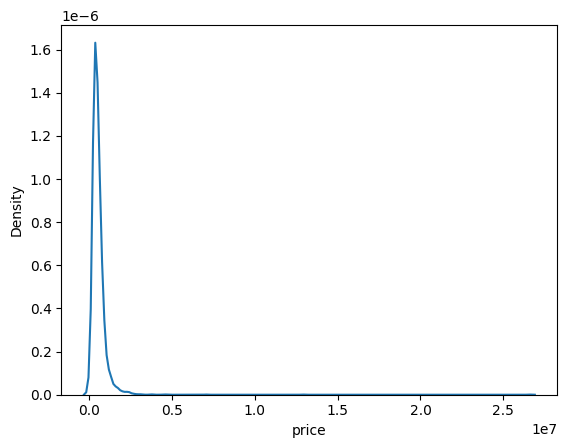

In [ ]:
# kdeplot

sns.kdeplot(data=house_data,x="price")

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

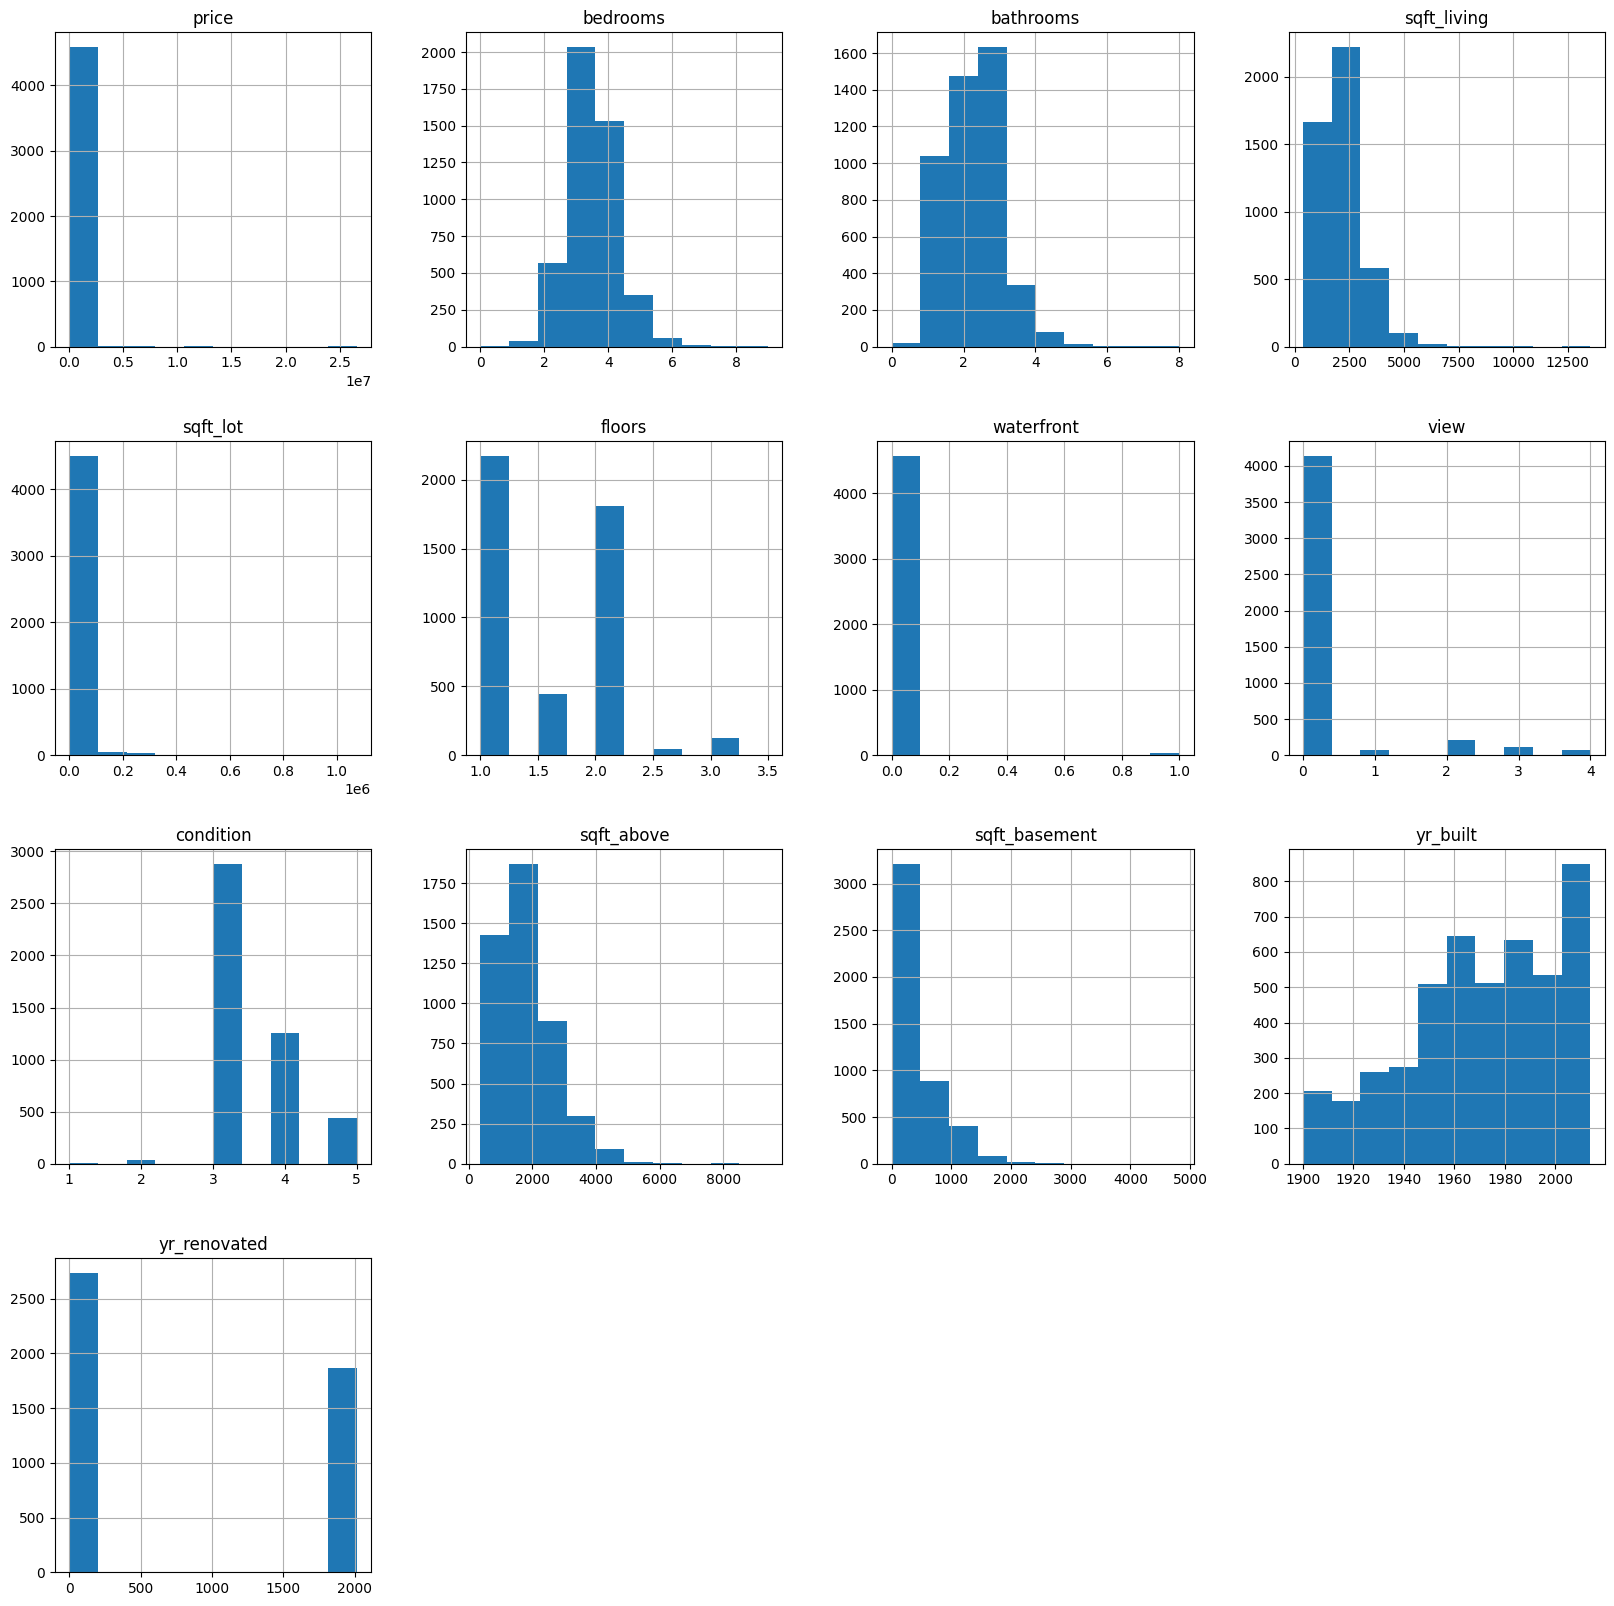

In [ ]:
house_data.hist(figsize=(20,20))

In [ ]:
# Split features and target variable
X = house_data.drop(columns=['price','country','statezip','city','street','date'])
y = house_data['price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor()
forest_model = RandomForestRegressor()

# Train models
linear_model.fit(X_train_scaled, y_train)
tree_model.fit(X_train_scaled, y_train)
forest_model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
linear_predictions = linear_model.predict(X_test_scaled)
tree_predictions = tree_model.predict(X_test_scaled)
forest_predictions = forest_model.predict(X_test_scaled)

# Evaluate models
linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)
tree_rmse = mean_squared_error(y_test, tree_predictions, squared=False)
forest_rmse = mean_squared_error(y_test, forest_predictions, squared=False)

linear_r2 = r2_score(y_test, linear_predictions)
tree_r2 = r2_score(y_test, tree_predictions)
forest_r2 = r2_score(y_test, forest_predictions)

# Print evaluation metrics
print("Linear Regression RMSE:", linear_rmse)
print("Decision Tree RMSE:", tree_rmse)
print("Random Forest RMSE:", forest_rmse)

print("Linear Regression R-squared:", linear_r2)
print("Decision Tree R-squared:", tree_r2)
print("Random Forest R-squared:", forest_r2)

Linear Regression RMSE: 993439.3625461654
Decision Tree RMSE: 1017660.5406071325
Random Forest RMSE: 996181.9687880328
Linear Regression R-squared: 0.03228385663277078
Decision Tree R-squared: -0.015479425871646857
Random Forest R-squared: 0.026933297761515318
